#### Marouane BIDOUKHACH - STIC

## Chargement des données



In [ ]:
import os
import pandas as pd

data_path = "C:/Users/Marouane Bidoukhach/TAC2/tac/data/CAMille/"
txt_files = [f for f in os.listdir(data_path) if f.endswith('.txt')]

data = []
for file in txt_files:
    with open(os.path.join(data_path, file), 'r', encoding='utf-8') as f:
        content = f.read()
        data.append({'filename': file, 'content': content})

df = pd.DataFrame(data)
print(f"Nombre de fichiers chargés : {len(df)}")
df.head()


Nombre de fichiers chargés : 1000


,filename,content
0,KB_JB567_1900-11-05_01-00003.txt,pliour de journaux aux ateliers de l'Indépenda...
1,KB_JB567_1902-03-26_01-00003.txt,"^ ms vu s à Louvain, serait dû à l'imprudence ..."
2,KB_JB567_1903-12-29_01-00003.txt,peul facilement introduire une pièce de dit ce...
3,KB_JB567_1904-01-06_01-00003.txt,■ gamin qui se blottit sous son lit et ne fut ...
4,KB_JB567_1905-11-26_01-00003.txt,Lcs faux billets sout imité» daus lu série des...


## Prétraitement des textes

In [9]:
import re
from nltk.corpus import stopwords

def preprocess_text(text):
    stop_words = set(stopwords.words('french'))
    text = re.sub(r'\W', ' ', text)  # Supprimer les caractères spéciaux
    text = text.lower()  
    words = text.split()
    words = [word for word in words if word not in stop_words]
    return ' '.join(words)


df['cleaned_content'] = df['content'].apply(preprocess_text)
df.head()


,filename,content,cleaned_content
0,KB_JB567_1900-11-05_01-00003.txt,pliour de journaux aux ateliers de l'Indépenda...,pliour journaux ateliers indépendance père do ...
1,KB_JB567_1902-03-26_01-00003.txt,"^ ms vu s à Louvain, serait dû à l'imprudence ...",ms vu louvain dû imprudence van ovenstrâeten f...
2,KB_JB567_1903-12-29_01-00003.txt,peul facilement introduire une pièce de dit ce...,peul facilement introduire pièce dit centimes ...
3,KB_JB567_1904-01-06_01-00003.txt,■ gamin qui se blottit sous son lit et ne fut ...,gamin blottit sous lit découvert matin àl aube...
4,KB_JB567_1905-11-26_01-00003.txt,Lcs faux billets sout imité» daus lu série des...,lcs faux billets sout imité daus lu série bill...


## Analyse des fréquences des mots

Mots les plus fréquents : [('prix', 14655), ('bruxelles', 13754), ('points', 12065), ('match', 11107), ('équipe', 10625), ('bat', 10249), ('dimanche', 10080), ('belgique', 9592), ('club', 9331), ('mètres', 9264), ('grand', 9094), ('heures', 8591), ('rue', 8368), ('très', 7641), ('première', 7219), ('coupe', 7203), ('course', 7066), ('division', 7047), ('championnat', 6872), ('belge', 6803)]


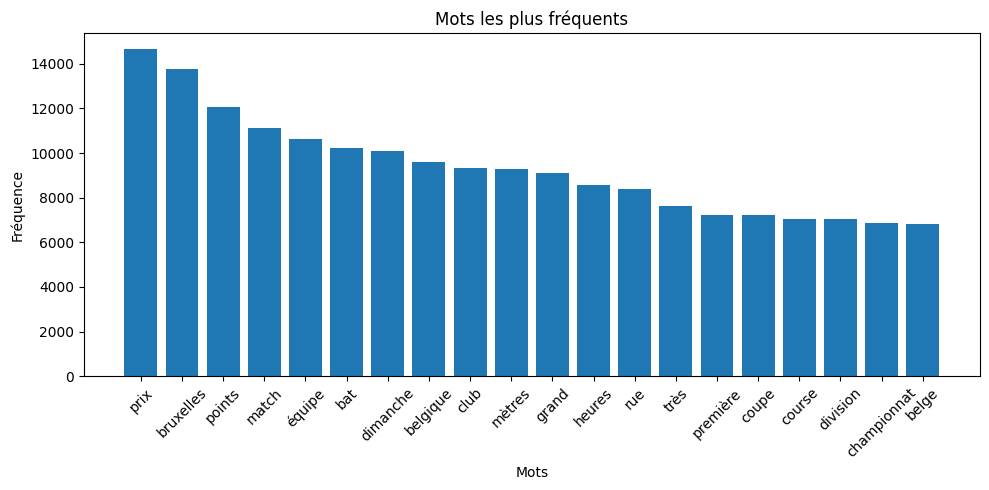

In [ ]:
import os
import re
from nltk.corpus import stopwords
from collections import Counter
import matplotlib.pyplot as plt
from nltk import wordpunct_tokenize, FreqDist


stop_words = set(stopwords.words('french'))

additional_stopwords = [
    "les", "plus", "cette", "fait", "faire", "être", "deux", "comme", "dont",
    "tout", "ils", "bien", "sans", "peut", "tous", "après", "ainsi", "donc",
    "cet", "sous", "celle", "entre", "encore", "toutes", "pendant", "moins",
    "dire", "cela", "non", "faut", "trois", "aussi", "dit", "avoir", "doit",
    "contre", "depuis", "autres", "van", "het", "autre", "jusqu"
]
stop_words.update(additional_stopwords)

def load_texts(path):
    all_text = ""
    for file_name in os.listdir(path):
        file_path = os.path.join(path, file_name)
        if os.path.isfile(file_path):
            with open(file_path, 'r', encoding='utf-8') as file:
                all_text += file.read() + " "
    return all_text

def preprocess_text(text):
    words = wordpunct_tokenize(text.lower())  
    words = [word for word in words if len(word) > 2 and word.isalpha()]  
    words = [word for word in words if word not in stop_words]  
    return words

text_data = load_texts(data_path)

cleaned_words = preprocess_text(text_data)

word_freq = FreqDist(cleaned_words)

most_common_words = word_freq.most_common(20)
print("Mots les plus fréquents :", most_common_words)

words, counts = zip(*most_common_words)
plt.figure(figsize=(10, 5))
plt.bar(words, counts)
plt.xticks(rotation=45)
plt.title('Mots les plus fréquents')
plt.xlabel('Mots')
plt.ylabel('Fréquence')
plt.tight_layout()
plt.show()


## Nuage de mots

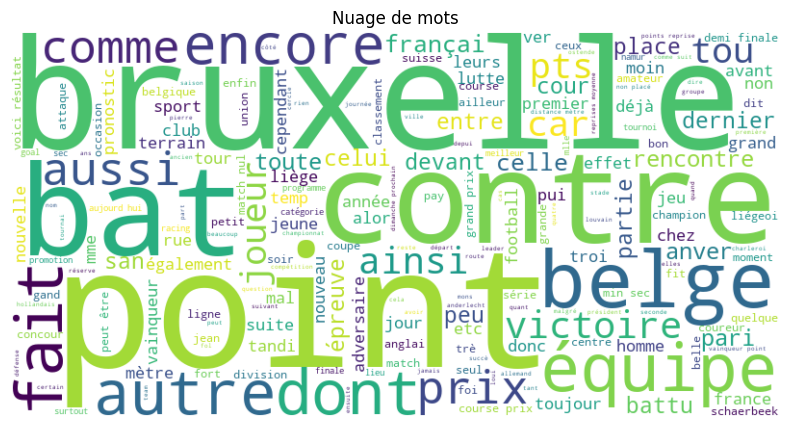

In [14]:
from wordcloud import WordCloud

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(all_words))

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Nuage de mots')
plt.show()


## Extraction des Mots-Clés (TF-IDF)

In [15]:
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.corpus import stopwords

stop_words = stopwords.words('french')

tfidf_vectorizer = TfidfVectorizer(max_features=10, stop_words=stop_words)
tfidf_matrix = tfidf_vectorizer.fit_transform(df['cleaned_content'])

feature_names = tfidf_vectorizer.get_feature_names_out()
keywords_per_document = []
for i, document in enumerate(tfidf_matrix.toarray()):
    keywords = [feature_names[index] for index in document.argsort()[-5:][::-1]]
    keywords_per_document.append((df['filename'][i], keywords))

for filename, keywords in keywords_per_document:
    print(f"Document: {filename}")
    print(f"Mots-Clés: {', '.join(keywords)}\n")


Document: KB_JB567_1900-11-05_01-00003.txt
Mots-Clés: 15, plus, 50, deux, cette

Document: KB_JB567_1902-03-26_01-00003.txt
Mots-Clés: 50, 10, 15, 11, deux

Document: KB_JB567_1903-12-29_01-00003.txt
Mots-Clés: cette, deux, plus, 11, bruxelles

Document: KB_JB567_1904-01-06_01-00003.txt
Mots-Clés: 50, 15, 10, plus, deux

Document: KB_JB567_1905-11-26_01-00003.txt
Mots-Clés: 10, 50, plus, 15, deux

Document: KB_JB567_1906-12-17_01-00003.txt
Mots-Clés: plus, 50, 15, cette, prix

Document: KB_JB567_1906-12-24_01-00001.txt
Mots-Clés: plus, cette, deux, van, 10

Document: KB_JB567_1907-04-04_01-00003.txt
Mots-Clés: 50, 10, bruxelles, 15, van

Document: KB_JB567_1907-04-18_01-00003.txt
Mots-Clés: 50, 10, plus, prix, bruxelles

Document: KB_JB567_1907-05-10_01-00003.txt
Mots-Clés: 50, 10, plus, deux, bruxelles

Document: KB_JB567_1907-05-15_01-00003.txt
Mots-Clés: 50, 10, plus, prix, 15

Document: KB_JB567_1907-08-29_01-00003.txt
Mots-Clés: 50, 10, 15, bruxelles, deux

Document: KB_JB567_1908

## Extraction des entités nommées (NER)

In [16]:
import spacy

nlp = spacy.load('fr_core_news_sm')

def extract_entities(text):
    doc = nlp(text)
    return [(ent.text, ent.label_) for ent in doc.ents]

df['entities'] = df['content'].apply(lambda x: extract_entities(x))
df[['filename', 'entities']].head()


,filename,entities
0,KB_JB567_1900-11-05_01-00003.txt,"[(gare du Nord, LOC), (rue de la Fiancée, LOC)..."
1,KB_JB567_1902-03-26_01-00003.txt,"[(Louvain, LOC), (Ai M. Van Ovenstrâeten, PER)..."
2,KB_JB567_1903-12-29_01-00003.txt,"[(Je Suis, MISC), (Ma', PER), (fort Hueo, LOC)..."
3,KB_JB567_1904-01-06_01-00003.txt,"[(Dinant, LOC), (arrivé.à Froi, PER), (Joséphi..."
4,KB_JB567_1905-11-26_01-00003.txt,"[(Vorétroeteu, PER), (trésorisM-diii-ecteur, L..."


## Analyse des sentiments

In [ ]:
from textblob import Blobber
from textblob_fr import PatternTagger, PatternAnalyzer


tb = Blobber(pos_tagger=PatternTagger(), analyzer=PatternAnalyzer())


def get_sentiment(input_text):
    blob = tb(input_text)
    polarity, subjectivity = blob.sentiment
    polarity_perc = f"{100 * abs(polarity):.0f}"
    subjectivity_perc = f"{100 * subjectivity:.0f}"
    if polarity > 0:
        polarity_str = f"{polarity_perc}% positive"
    elif polarity < 0:
        polarity_str = f"{polarity_perc}% negative"
    else:
        polarity_str = "neutral"
    if subjectivity > 0:
        subjectivity_str = f"{subjectivity_perc}% subjective"
    else:
        subjectivity_str = "perfectly objective"
    return f"This text is {polarity_str} and {subjectivity_str}."


sentiments = []
for text in texts[:10]:  
    sentiment = get_sentiment(text)
    sentiments.append(sentiment)


for idx, sentiment in enumerate(sentiments):
    print(f"Document {files[idx]}: {sentiment}")


Document KB_JB567_1900-11-05_01-00003.txt: This text is 8% positive and 26% subjective.
Document KB_JB567_1902-03-26_01-00003.txt: This text is 5% positive and 24% subjective.
Document KB_JB567_1903-12-29_01-00003.txt: This text is 9% positive and 25% subjective.
Document KB_JB567_1904-01-06_01-00003.txt: This text is 7% positive and 22% subjective.
Document KB_JB567_1905-11-26_01-00003.txt: This text is 11% positive and 29% subjective.
Document KB_JB567_1906-12-17_01-00003.txt: This text is 11% positive and 24% subjective.
Document KB_JB567_1906-12-24_01-00001.txt: This text is 10% positive and 26% subjective.
Document KB_JB567_1907-04-04_01-00003.txt: This text is 4% positive and 21% subjective.
Document KB_JB567_1907-04-18_01-00003.txt: This text is 11% positive and 22% subjective.
Document KB_JB567_1907-05-10_01-00003.txt: This text is 8% positive and 23% subjective.


## Clustering des documents

[nltk_data] Downloading package punkt to C:\Users\Marouane
[nltk_data]     Bidoukhach\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to C:\Users\Marouane
[nltk_data]     Bidoukhach\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Clustering des documents par groupe :
Cluster 2: ['KB_JB567_1900-11-05_01-00003.txt', 'KB_JB567_1902-03-26_01-00003.txt', 'KB_JB567_1903-12-29_01-00003.txt', 'KB_JB567_1904-01-06_01-00003.txt', 'KB_JB567_1905-11-26_01-00003.txt'] ...
Cluster 4: ['KB_JB567_1908-04-22_01-00003.txt', 'KB_JB567_1908-09-16_01-00003.txt', 'KB_JB567_1909-07-07_01-00003.txt', 'KB_JB567_1910-01-08_01-00003.txt', 'KB_JB567_1910-04-19_01-00003.txt'] ...
Cluster 0: ['KB_JB567_1924-06-10_01-00003.txt', 'KB_JB838_1923-06-12_01-00003.txt', 'KB_JB838_1923-08-26_01-00004.txt', 'KB_JB838_1924-05-09_01-00005.txt', 'KB_JB838_1924-06-21_01-00005.txt'] ...
Cluster 3: ['KB_JB567_1924-11-30_01-00003.txt', 'KB_JB838_1925-02-09_01-00005.txt', 'KB_JB838_1925-02-23_01-00006.txt', 'KB_JB838_1930-12-19_01-00005.txt', 'KB_JB838_1931-03-09_01-00005.txt'] ...
Cluster 1: ['KB_JB838_1925-03-16_01-00003.txt', 'KB_JB838_1930-02-10_01-00003.txt', 'KB_JB838_1930-04-14_01-00003.txt', 'KB_JB838_1931-12-23_01-00005.txt', 'KB_JB838_1932-01-27_0

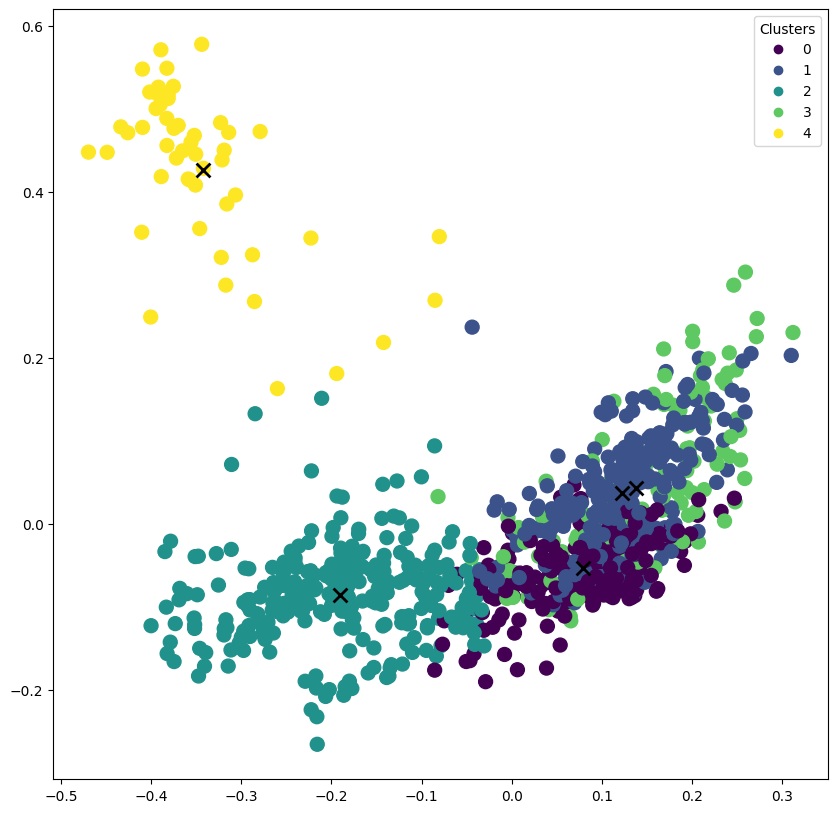

In [4]:
import os
import string
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from sklearn.cluster import KMeans
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
from scipy.spatial.distance import cosine
import nltk
from collections import defaultdict

nltk.download('punkt')
nltk.download('stopwords')

data_path = "C:/Users/Marouane Bidoukhach/TAC2/tac/data/CAMille/"

def load_files(data_path):
    files = [f for f in sorted(os.listdir(data_path)) if f.endswith('.txt')]
    texts = [open(os.path.join(data_path, f), encoding='utf-8').read() for f in files]
    return files, texts

files, texts = load_files(data_path)

def preprocessing(text):
    text = text.translate(str.maketrans('', '', string.punctuation))
    tokens = word_tokenize(text.lower())
    stop_words = set(stopwords.words('french'))
    tokens = [word for word in tokens if word not in stop_words and word.isalpha()]
    return ' '.join(tokens)

processed_texts = [preprocessing(text) for text in texts]

vectorizer = TfidfVectorizer(max_df=0.5, min_df=0.1)
tfidf_vectors = vectorizer.fit_transform(processed_texts)

N_CLUSTERS = 5
km_model = KMeans(n_clusters=N_CLUSTERS, random_state=42)
clusters = km_model.fit_predict(tfidf_vectors)

clustering = defaultdict(list)
for idx, label in enumerate(clusters):
    clustering[label].append(files[idx])

print("Clustering des documents par groupe :")
for cluster_id, docs in clustering.items():
    print(f"Cluster {cluster_id}: {docs[:5]} ...")

pca = PCA(n_components=2)
reduced_vectors = pca.fit_transform(tfidf_vectors.toarray())

x_axis = reduced_vectors[:, 0]
y_axis = reduced_vectors[:, 1]

plt.figure(figsize=(10,10))
scatter = plt.scatter(x_axis, y_axis, s=100, c=clusters)

centroids = pca.transform(km_model.cluster_centers_)
plt.scatter(centroids[:, 0], centroids[:, 1],  marker = "x", s=100, linewidths = 2, color='black')

plt.legend(handles=scatter.legend_elements()[0], labels=set(clusters), title="Clusters")

## Représentation sémantique avec Word2Vec

In [20]:
from gensim.models import Word2Vec


sentences = df['cleaned_content'].apply(lambda x: x.split()).tolist()
model = Word2Vec(sentences, vector_size=100, window=5, min_count=2, workers=4)


print("Mots proches de 'football' :")
print(model.wv.most_similar('football', topn=10))


Mots proches de 'football' :
[('hockey', 0.6201825737953186), ('basket', 0.5837243795394897), ('athlétisme', 0.5590901970863342), ('caractère', 0.553641140460968), ('télévision', 0.5448389649391174), ('retransmission', 0.5386542081832886), ('soccer', 0.5347861647605896), ('foot', 0.5329086184501648), ('prépare', 0.5305289626121521), ('teenagers', 0.5210482478141785)]
